In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Import the dataset
import kagglehub as kh
from kagglehub import KaggleDatasetAdapter

df = kh.load_dataset(KaggleDatasetAdapter.PANDAS, "yekahaaagayeham/jamboree-education", "Jamboree Education.csv")
df.head(10)

/tmp/ipykernel_12341/59565415.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kh.load_dataset(KaggleDatasetAdapter.PANDAS, "yekahaaagayeham/jamboree-education", "Jamboree Education.csv")


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [3]:
# Analyze the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


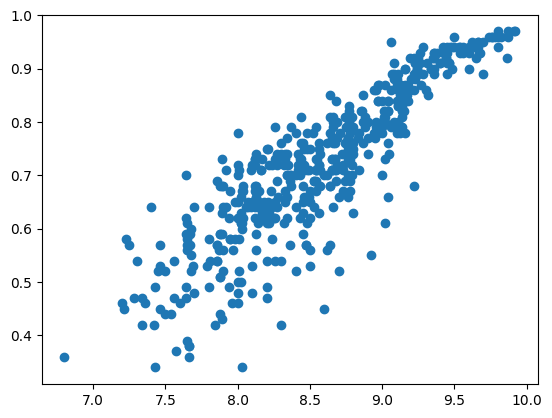

In [4]:
# Consider the columns CGPA and `Chance of Admit` for an univariate linear regression modal
x, y = df["CGPA"], df["Chance of Admit "]
plt.scatter(x, y)
plt.show()

Skewness:  -0.026612517318359303
Correlation:  0.8824125749045737


<Axes: >

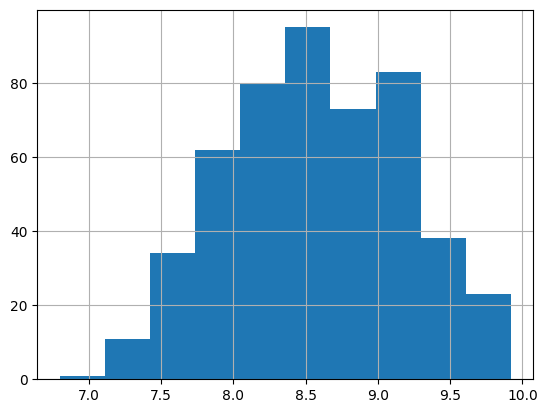

In [5]:
print("Skewness: ", df["CGPA"].skew())
print("Correlation: ",df["CGPA"].corr(df["Chance of Admit "]))
df["CGPA"].hist()

In [6]:
# Prepare the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train = np.array([x_train]).reshape(400, 1)
x_test = np.array([x_test]).reshape(100, 1)
print('x train: ', x_train.shape)
print('x test: ', x_test.shape)

x train:  (400, 1)
x test:  (100, 1)


In [7]:
# Train the univariate linear regression modal
lnr_reg = LinearRegression()
lnr_reg.fit(x_train, y_train)

LinearRegression()

In [8]:
# Test and analyze the modal's performance
y_pred = lnr_reg.predict(x_test)
print('r2: ',r2_score(y_test, y_pred))
print('mse: ', mean_squared_error(y_test, y_pred))

r2:  0.7444433788008283
mse:  0.004463232500088233


X (CGPA): 7.75  Y:  [0.54961356]


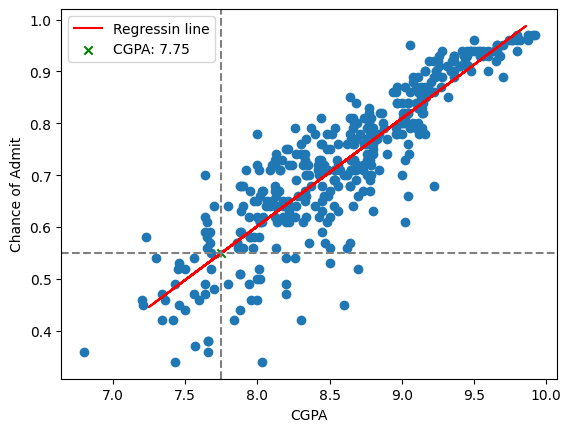

In [20]:
y_op = lnr_reg.predict([[7.75]])
print('X (CGPA): 7.75  Y: ', y_op)
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color = 'r', label = 'Regressin line')
plt.scatter(7.75, y_op[0], color = 'g', marker = 'x', label = 'CGPA: 7.75')
plt.axhline(y = y_op, color = 'gray', linestyle = '--')
plt.axvline(x = 7.75, color = 'gray', linestyle = '--')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()

In [21]:
### Multiple linear regression ###
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [23]:
df = df.drop("Serial No.", axis = "columns")
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

GRE Score
Skewness:  -0.03984185809159066
Correlation:  0.8103506354632607


<Axes: >

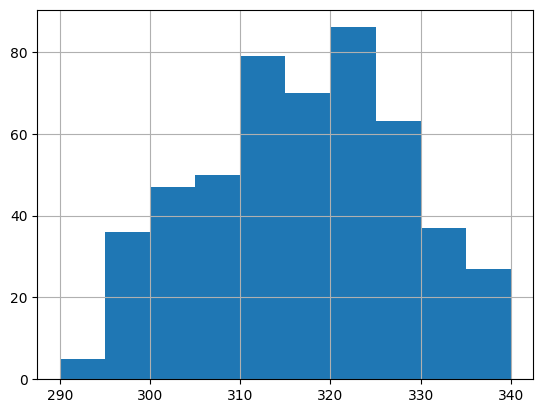

In [24]:
print("GRE Score")
print("Skewness: ", df["GRE Score"].skew())
print("Correlation: ",df["GRE Score"].corr(df["Chance of Admit "]))
df["GRE Score"].hist()

TOEFL Score
Skewness:  0.09560097235726285
Correlation:  0.7922276143050841


<Axes: >

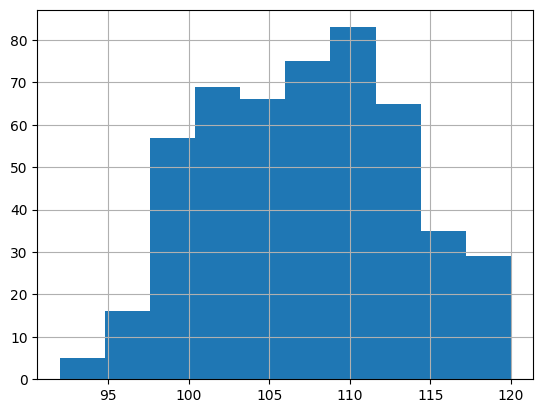

In [25]:
print("TOEFL Score")
print("Skewness: ", df["TOEFL Score"].skew())
print("Correlation: ",df["TOEFL Score"].corr(df["Chance of Admit "]))
df["TOEFL Score"].hist()

University Rating
Skewness:  0.09029498312712977
Correlation:  0.6901323687886906


<Axes: >

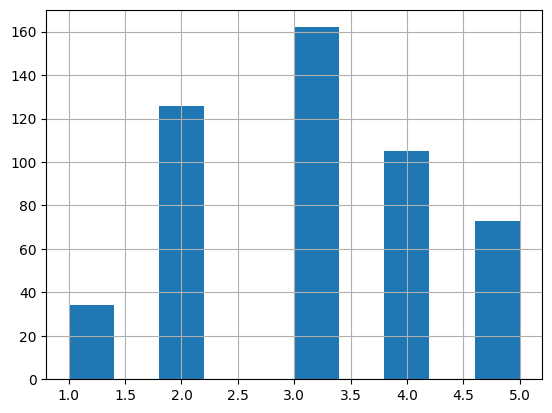

In [26]:
print("University Rating")
print("Skewness: ", df["University Rating"].skew())
print("Correlation: ",df["University Rating"].corr(df["Chance of Admit "]))
df["University Rating"].hist()

SOP
Skewness:  -0.22897239628779945
Correlation:  0.6841365241316723


<Axes: >

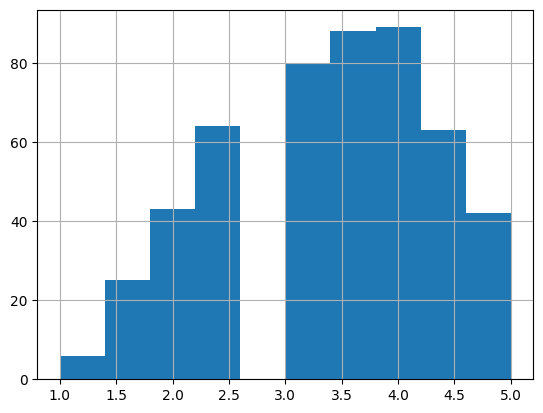

In [27]:
print("SOP")
print("Skewness: ", df["SOP"].skew())
print("Correlation: ",df["SOP"].corr(df["Chance of Admit "]))
df["SOP"].hist()

LOR
Skewness:  -0.1452903146082398
Correlation:  0.6453645135280114


<Axes: >

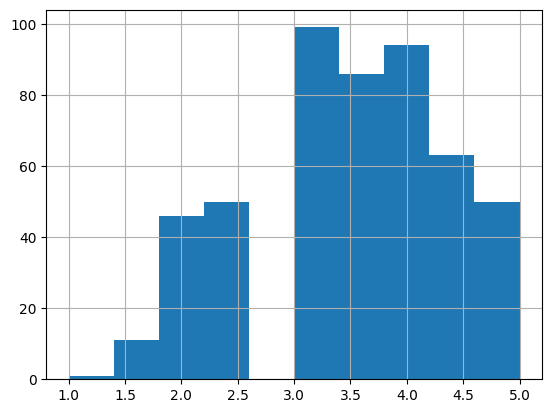

In [28]:
print("LOR")
print("Skewness: ", df["LOR "].skew())
print("Correlation: ",df["LOR "].corr(df["Chance of Admit "]))
df["LOR "].hist()

CGPA
Skewness:  -0.026612517318359303
Correlation:  0.8824125749045737


<Axes: >

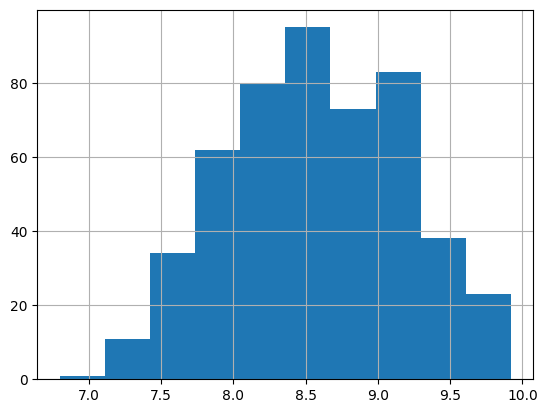

In [29]:
print("CGPA")
print("Skewness: ", df["CGPA"].skew())
print("Correlation: ",df["CGPA"].corr(df["Chance of Admit "]))
df["CGPA"].hist()

Reseach
Skewness:  -0.24247492100796933
Correlation:  0.5458710294711387


<Axes: >

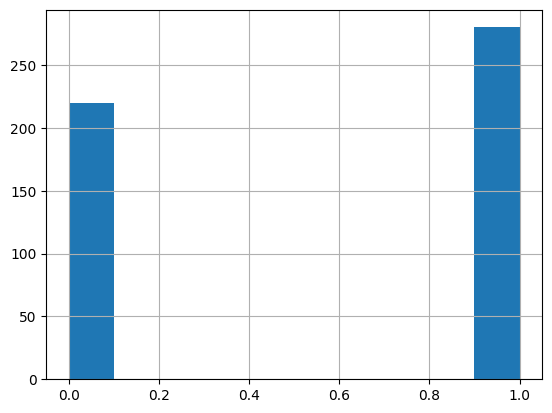

In [30]:
print("Reseach")
print("Skewness: ", df["Research"].skew())
print("Correlation: ",df["Research"].corr(df["Chance of Admit "]))
df["Research"].hist()

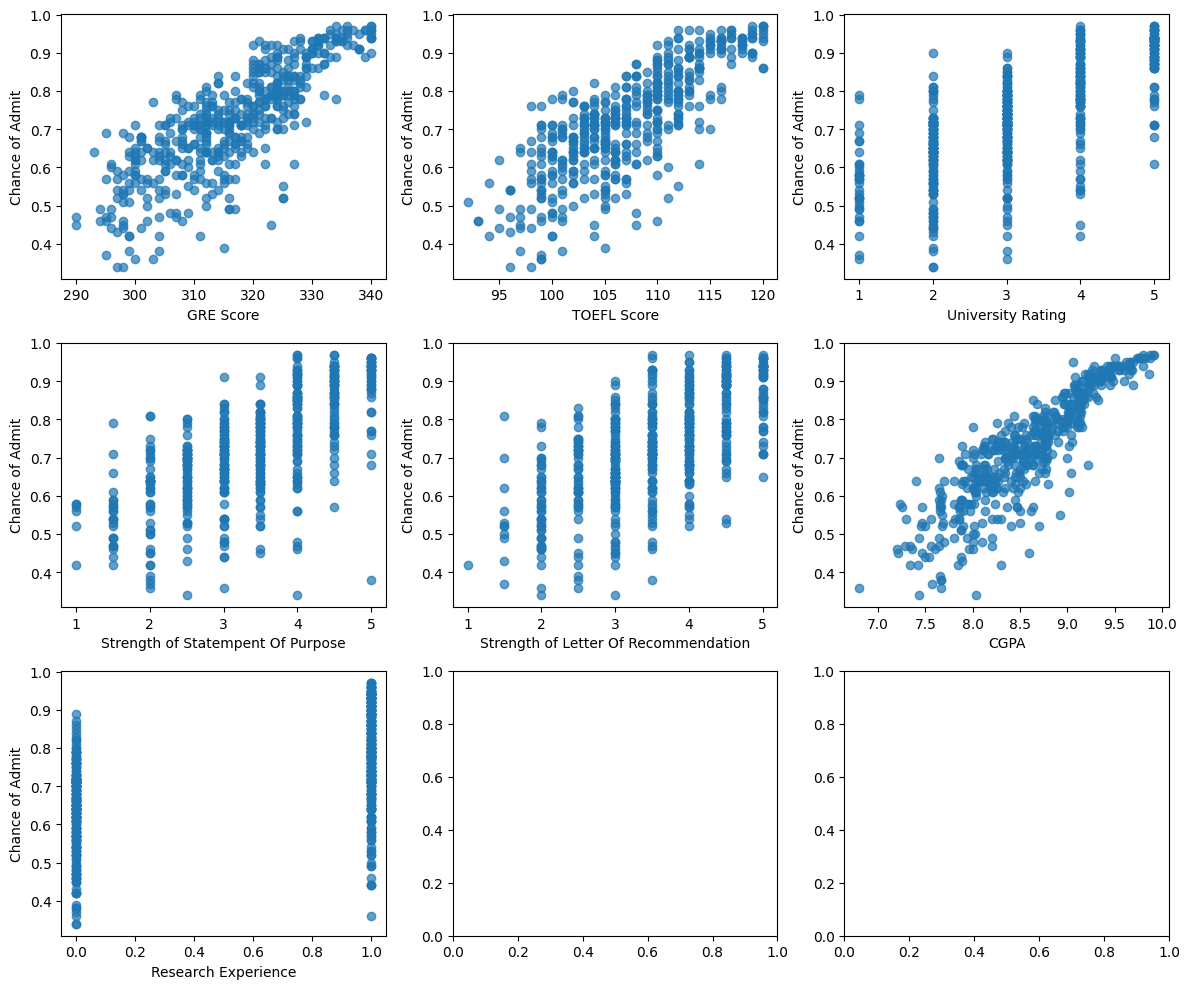

In [31]:
fig, axes = plt.subplots(3, 3, figsize = (12, 10))

axes[0, 0].scatter(df["GRE Score"], df["Chance of Admit "], alpha = 0.7)
axes[0, 0].set_xlabel('GRE Score')
axes[0, 0].set_ylabel('Chance of Admit')

axes[0, 1].scatter(df["TOEFL Score"], df["Chance of Admit "], alpha = 0.7)
axes[0, 1].set_xlabel('TOEFL Score')
axes[0, 1].set_ylabel('Chance of Admit')

axes[0, 2].scatter(df["University Rating"], df["Chance of Admit "], alpha = 0.7)
axes[0, 2].set_xlabel('University Rating')
axes[0, 2].set_ylabel('Chance of Admit')

axes[1, 0].scatter(df["SOP"], df["Chance of Admit "], alpha = 0.7)
axes[1, 0].set_xlabel('Strength of Statempent Of Purpose')
axes[1, 0].set_ylabel('Chance of Admit')

axes[1, 1].scatter(df["LOR "], df["Chance of Admit "], alpha = 0.7)
axes[1, 1].set_xlabel('Strength of Letter Of Recommendation')
axes[1, 1].set_ylabel('Chance of Admit')

axes[1, 2].scatter(df["CGPA"], df["Chance of Admit "], alpha = 0.7)
axes[1, 2].set_xlabel('CGPA')
axes[1, 2].set_ylabel('Chance of Admit')

axes[2, 0].scatter(df["Research"], df["Chance of Admit "], alpha = 0.7)
axes[2, 0].set_xlabel('Research Experience')
axes[2, 0].set_ylabel('Chance of Admit')

plt.tight_layout()
plt.show()

In [33]:
dataset = df[["GRE Score", "TOEFL Score", "CGPA", "Chance of Admit "]]
dataset.head()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,337,118,9.65,0.92
1,324,107,8.87,0.76
2,316,104,8.00,0.72
3,322,110,8.67,0.80
4,314,103,8.21,0.65


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GRE Score         500 non-null    int64  
 1   TOEFL Score       500 non-null    int64  
 2   CGPA              500 non-null    float64
 3   Chance of Admit   500 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


In [35]:
x = dataset[['GRE Score', 'TOEFL Score', 'CGPA']]
y = dataset[['Chance of Admit ']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print('x train: ', x_train.shape)
print('x test: ', x_test.shape)
x_train.head()

x train:  (400, 3)
x test:  (100, 3)


,GRE Score,TOEFL Score,CGPA
238,310,104,8.37
438,318,110,8.54
475,300,101,7.88
58,300,99,6.80
380,322,104,8.84


In [36]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [37]:
mul_lr_reg = LinearRegression()
mul_lr_reg.fit(x_train_scaled, y_train)

LinearRegression()

In [38]:
y_pred = mul_lr_reg.predict(x_test_scaled)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('r2: ', r2_score(y_test, y_pred))

MSE:  0.0040814976388947235
r2:  0.7886439004249017
